# 6. lekce: Cvičení

## Plocha garáže

Na minulé lekci jsme řešili **korelaci mezi plochou garáže (`GarageArea`) a cenou domu (`SalePrice`)**. Ověř nyní, zda je tato korelace statisticky významná.

- Nejprve sestav hypotézy (nulovou i alternativní).
- Již víme, že cena domu nemá normální rozdělení, nelze tedy použít test na základě Pearsonova korelačního koeficientu. Použij Spearmanův koeficient i Kendallovo tau pro ověření statistické významnosti lineární závislosti. Zjisti p-hodnoty obou testů. Jaké jsou p-hodnoty? Jsou výsledky obou testů v souladu? A zamítáme nulovou hypotézu?

### Hypotézy

- **H<sub>0</sub> (nulová)**: Plocha garáže a cena domu jsou lineárně nezávislé.

- **H<sub>1</sub> (alternativní)**: Plocha garáže a cena domu jsou lineárně závislé.

### Testy

In [130]:
import pandas
from scipy import stats

data = pandas.read_csv("data/house_prices.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946+,RL,65.0,8450,Pave,NaN,0,Lvl,3,...,0,0,0,NaN,0,Feb,2008,WD,Normal,208500
1,2,1-STORY 1946+,RL,80.0,9600,Pave,NaN,0,Lvl,3,...,0,0,0,NaN,0,May,2007,WD,Normal,181500
2,3,2-STORY 1946+,RL,68.0,11250,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Sept,2008,WD,Normal,223500
3,4,2-STORY 1945-,RL,60.0,9550,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Feb,2006,WD,Abnorml,140000
4,5,2-STORY 1946+,RL,84.0,14260,Pave,NaN,1,Lvl,3,...,0,0,0,NaN,0,Dec,2008,WD,Normal,250000


In [131]:
# Bonus: Vytvoříme si funkci pro zhodnocení nulové hypotézy na základě výsledku testu
def test_hypotheses(test_result, threshold=0.05):
    if test_result.pvalue < threshold:
        print(f"H0 rejected at {threshold} level of significance.")
    else:
        print(f"H0 not rejected at {threshold} level of significance.")

- **Spearmanův koeficient** (neparametrický test statistické významnosti korelace)

In [132]:
result_spearman = stats.spearmanr(data["GarageArea"], data["SalePrice"])

print(result_spearman)
test_hypotheses(result_spearman)

SpearmanrResult(correlation=0.6490301173484124, pvalue=6.986729259305694e-175)
H0 rejected at 0.05 level of significance.


- **Kendallovo tau** (neparametrický test statistické významnosti korelace)

In [133]:
result_kendalltau = stats.kendalltau(data["GarageArea"], data["SalePrice"])

print(result_kendalltau)
test_hypotheses(result_kendalltau)

KendalltauResult(correlation=0.4780320142820046, pvalue=1.9398423480396507e-162)
H0 rejected at 0.05 level of significance.


... Na základě obou testů můžeme zamítnout nulovou hypotézu (na hladině významnosti 5 %) -> Podpořena je alternativní hypotéza, tzn. *Plocha garáže a cena domu jsou lineárně závislé*.

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

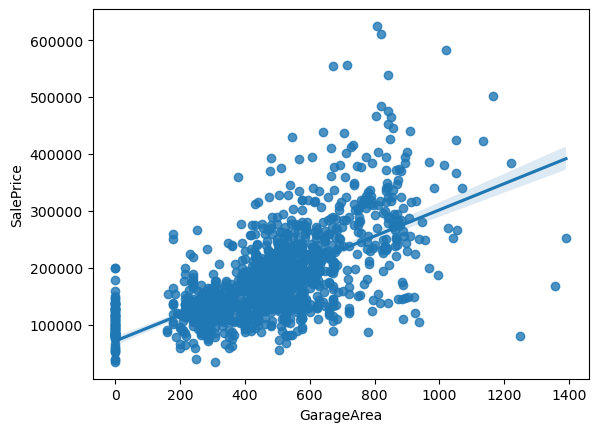

In [134]:
# Můžeme se ještě podívat, jak závislost vypadá graficky
import seaborn

# seaborn.scatterplot(data=data, x="GarageArea", y="SalePrice")
seaborn.regplot(data=data, x="GarageArea", y="SalePrice")

## Plocha garáže 2

Ač cena domu nemá normální rozdělení, možná by ho mohla mít plocha garáže. **Ověř hypotézu normality pro plochu garáže**. Formuluj hypotézy, následně použij Shapiro-Wilk test. Jaká je p-hodnota testu? A co to znamená?

### Hypotézy

- **H<sub>0</sub> (nulová)**: Plochy garáže v našem souboru mají normální rozdělení.

- **H<sub>1</sub> (alternativní)**: Plochy garáže v našem souboru nemají normální rozdělení.

### Test

- **Shapiro-Wilk** (test normálního rozdělení)

In [135]:
result_shapiro = stats.shapiro(data["GarageArea"])

print(result_shapiro)
test_hypotheses(result_shapiro)

ShapiroResult(statistic=0.9767375588417053, pvalue=1.3495225377187052e-14)
H0 rejected at 0.05 level of significance.


... Zamítáme nulovou hypotézu (na hladině významnosti 5 %) -> Podpořena je alternativní hypotéza, tzn. *Plochy garáže v našem souboru nemají normální rozdělení*.

## Bonus: Vztahy a známky

Uvažuj data v souboru [student-mat.csv](data/student-mat.csv). Jedná se o data, která obsahují výsledky studentů matematiky na portugalských školách. **Chceme ověřit, zda je statistické rozdělení výsledků studentů a studentek ovlivněno tím, jestli mají romatický vztah**.

Výsledky z testu jsou uloženy ve sloupci `G3` a informace o tom, jestli má student/ka milostný vztah, je ve sloupci `romantic`. Rozděl data do dvou tabulek - v jedné tabulce budou studenti a studentky mající vztah a ve druhém ti, kteří vztah nemají. Ověř, kolik je v každé tabulce záznamů. Pro lepší představu si můžeš vytvořit z obou tabulek graf histogramu nebo odhad distribuční funkce, obojí jsme dělali na 5. lekci. Naším úkolem je zjistit, jestli je rozdíl obou grafů natolik velký, abychom mohli říct, že to není náhoda.

Dále se drž postupu, který jsme si ukazovali. Jde nám o **porovnání statistických rozdělení. Jaká bude nulová a jaká bude alternativní hypotéza? A jaký test využijeme?** Podívej se na seznam testů níže nebo na rozhodovací strom a vyber vhodný test. Je třeba uvážit kolik máme souborů dat a zda jsou data párová nebo ne.

Po výběru vhodného testu zkus tento test provést. **Jaká je p-hodnota? A co to znamená?**

In [136]:
data2 = pandas.read_csv("data/student-mat.csv")
data2.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Hypotézy

- **H<sub>0</sub> (nulová)**: Rozdělení výsledků studentů se vztahem a studentů bez vztahu jsou stejná.

- **H<sub>1</sub> (alternativní)**: Rozdělení výsledků studentů se vztahem a studentů bez vztahu jsou stejná.

In [137]:
# Výběr studentů se vztahem a bez
relationship_yes = data2[data2["romantic"] == "yes"]
relationship_no = data2[data2["romantic"] == "no"]

# Alternativa pro zajímavost - metoda query():
# relationship_yes = data2.query('romantic == "yes"')
# relationship_no = data2.query('romantic == "no"')

print(f"Se vztahem: {len(relationship_yes)}. Bez vztahu: {len(relationship_no)}")

Se vztahem: 132. Bez vztahu: 263


### Pohled na data

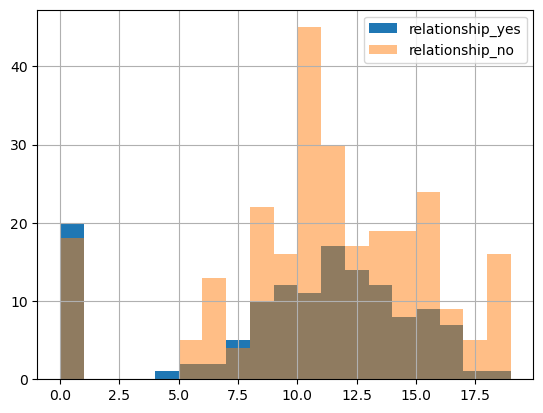

In [138]:
import matplotlib.pyplot as plt

# Histogramy obou skupin s překrytím
# ...parametr alpha zajistí průhlednost (čím nižší, tím průhlednější)
relationship_yes["G3"].hist(bins=range(0, 20))
relationship_no["G3"].hist(bins=range(0, 20), alpha=0.5)
plt.legend(["relationship_yes","relationship_no"])

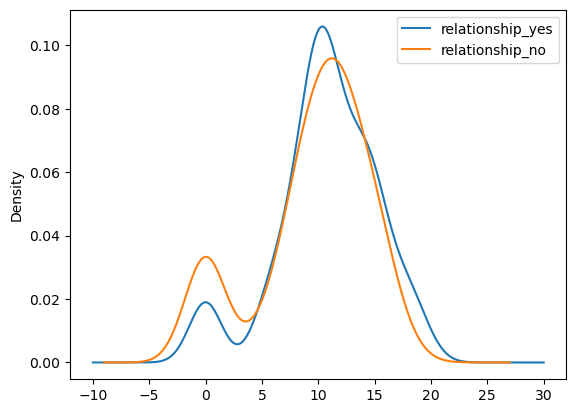

In [139]:
relationship_no["G3"].plot.kde()
relationship_yes["G3"].plot.kde()
plt.legend(["relationship_yes","relationship_no"])

### Test

Výběr testu provedeme na základě následujících informací:
- máme dva soubory,
- chceme porovnat jejich rozdělení,
- data nejsou párová (jsou to dvě různé skupiny lidí).

--> **Mann-Whitney** (dvouvýběrový neparametrický test na rozdělení)

In [140]:
result_mannwhitneyu = stats.mannwhitneyu(relationship_yes["G3"], relationship_no["G3"])

print(result_mannwhitneyu)
test_hypotheses(result_mannwhitneyu)

MannwhitneyuResult(statistic=15423.0, pvalue=0.06952998588160815)
H0 not rejected at 0.05 level of significance.


... Nulovou hypotézu nezamítáme (na hladině významnosti 5 %), tj. neprokázali jsme, že by výsledky těchto dvou skupin měly různé rozdělení.